In [1]:
%pip install pydeseq2

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

In [3]:
#leitura do Dataset
counts = pd.read_csv('count_table.csv')
counts

,Geneid,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
0,ENSG00000284662,0,0,0,0,0,0,0,0
1,ENSG00000186827,0,0,1,1,4,0,0,3
2,ENSG00000186891,1,0,0,0,0,2,2,2
3,ENSG00000160072,361,427,416,549,328,174,246,202
4,ENSG00000041988,118,156,124,133,101,56,85,89
...,...,...,...,...,...,...,...,...,...
60658,ENSG00000271254,56,55,54,76,47,67,49,53
60659,ENSG00000275987,0,0,1,0,0,0,0,0
60660,ENSG00000268674,0,0,0,0,0,0,0,0
60661,ENSG00000277475,0,0,0,0,0,0,0,0


In [4]:
#Transforma a coluna Geneid em índice 
counts = counts.set_index('Geneid')
counts

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000284662,0,0,0,0,0,0,0,0
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
...,...,...,...,...,...,...,...,...
ENSG00000271254,56,55,54,76,47,67,49,53
ENSG00000275987,0,0,1,0,0,0,0,0
ENSG00000268674,0,0,0,0,0,0,0,0


In [5]:
#remove todas as linhas que têm soma zero
counts = counts[counts.sum(axis = 1) > 0]
counts

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
ENSG00000260179,2,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...
ENSG00000278817,0,0,1,0,1,0,1,0
ENSG00000278384,2,7,6,5,8,2,2,1
ENSG00000276345,20,0,0,0,0,12,0,0


In [6]:
# Faz transposição das colunas
counts = counts.T

In [7]:
counts

Geneid,ENSG00000186827,ENSG00000186891,ENSG00000160072,ENSG00000041988,ENSG00000260179,ENSG00000225972,ENSG00000224315,ENSG00000198744,ENSG00000228037,ENSG00000142611,...,ENSG00000278673,ENSG00000278704,ENSG00000277400,ENSG00000276256,ENSG00000273748,ENSG00000278817,ENSG00000278384,ENSG00000276345,ENSG00000271254,ENSG00000275987
Ctr_s1,0,1,361,118,2,6,0,1,0,73,...,1,0,4,74,26,0,2,20,56,0
Ctr_s2,0,0,427,156,0,2,0,494,0,24,...,1,0,0,16,50,0,7,0,55,0
Ctr_s7,1,0,416,124,1,3,0,6,0,54,...,0,0,1,68,37,1,6,0,54,1
Ctr_s13,1,0,549,133,2,4,0,4,0,14,...,0,0,3,28,15,0,5,0,76,0
RS_s6,4,0,328,101,0,8,1,624,0,5,...,1,0,1,15,40,1,8,0,47,0
RS_s9,0,2,174,56,1,1,0,0,1,11,...,0,0,0,21,20,0,2,12,67,0
RS_s12,0,2,246,85,0,3,0,4,1,17,...,0,2,3,28,30,1,2,0,49,0
RS_s16,3,2,202,89,0,5,0,3,0,1,...,0,0,0,16,13,0,1,0,53,0


In [8]:
#Cria um arquivo de metadados associando as amostras as suas respectivas condições
metadata = pd.DataFrame(zip(counts.index, ['C','C','C','C', 'RS', 'RS', 'RS', 'RS']),
                        columns = ['Sample', 'Condition'])

In [9]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Ctr_s1,C
Ctr_s2,C
Ctr_s7,C
Ctr_s13,C
RS_s6,RS
RS_s9,RS
RS_s12,RS
RS_s16,RS


In [10]:
# cria um objeto DeseqDataSet para análise diferencial
dds = DeseqDataSet(counts=counts,
            metadata=metadata,
            design_factors="Condition")


#design_factors=["batch", "condition"] = ~ batch + condtion

In [11]:
dds.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 8.20 seconds.

Fitting dispersion trend curve...
... done in 3.33 seconds.

C:\Users\edusa\AppData\Local\Programs\Python\Python38\lib\site-packages\anndata\_core\views.py:113: RuntimeWarning: invalid value encountered in log
  results = super().__array_ufunc__(
Fitting MAP dispersions...
... done in 16.47 seconds.

C:\Users\edusa\AppData\Local\Programs\Python\Python38\lib\site-packages\pydeseq2\dds.py:707: RuntimeWarning: invalid value encountered in log
  self.varm["_outlier_genes"] = np.log(self.varm["genewise_dispersions"]) > np.log(
Fitting LFCs...
... done in 7.71 seconds.

Refitting 0 outliers.



In [12]:
dds

AnnData object with n_obs × n_vars = 8 × 31378
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [13]:
#etapa final da análise de expressão diferencial no pyDESeq2, onde são calculados...
#...os resultados estatísticos comparando dois grupos definidos no seu experimento

#stat_res = DeseqStats(dds, n_cpus=8, contrast = ('Condition','RS','C'))
stat_res = DeseqStats(dds, contrast=('Condition', 'RS', 'C'))# versão atualizada

In [16]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition RS vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                      
ENSG00000186827    1.107782        2.119166  1.486697  1.425419  0.154036   
ENSG00000186891    1.071147        2.761974  1.566738  1.762882  0.077920   
ENSG00000160072  320.481168       -0.492175  0.147030 -3.347457  0.000816   
ENSG00000041988  103.354977       -0.282138  0.130485 -2.162226  0.030601   
ENSG00000260179    0.758697       -1.637766  1.558991 -1.050529  0.293475   
...                     ...             ...       ...       ...       ...   
ENSG00000278817    0.352622        1.119898  1.744744  0.641870  0.520958   
ENSG00000278384    3.791022       -0.243724  0.662745 -0.367750  0.713060   
ENSG00000276345    4.833929       -0.092388  3.260101 -0.028339  0.977392   
ENSG00000271254   58.543851        0.316375  0.333484  0.948695  0.342776   
ENSG00000275987    0

... done in 2.69 seconds.



In [17]:
#extrai os resultados estatísticos completos da análise de expressão diferencial realizada pelo DeseqStats em um DataFrame do pandas, onde cada linha representa um gene e as colunas contêm métricas estatísticas
res = stat_res.results_df

In [18]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000186827,1.107782,2.119166,1.486697,1.425419,0.154036,NaN
ENSG00000186891,1.071147,2.761974,1.566738,1.762882,0.077920,NaN
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132
ENSG00000260179,0.758697,-1.637766,1.558991,-1.050529,0.293475,NaN
...,...,...,...,...,...,...
ENSG00000278817,0.352622,1.119898,1.744744,0.641870,0.520958,NaN
ENSG00000278384,3.791022,-0.243724,0.662745,-0.367750,0.713060,0.894836
ENSG00000276345,4.833929,-0.092388,3.260101,-0.028339,0.977392,0.993656


In [19]:
%pip install sanbomics

Note: you may need to restart the kernel to use updated packages.


In [20]:
# mapear genes
from sanbomics.tools import id_map

In [21]:
mapper = id_map(species = 'human')#genes humanos

In [22]:
res['Symbol'] = res.index.map(mapper.mapper) #adiciona o nome do gene na respectiva linha

In [23]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000186827,1.107782,2.119166,1.486697,1.425419,0.154036,NaN,TNFRSF4
ENSG00000186891,1.071147,2.761974,1.566738,1.762882,0.077920,NaN,TNFRSF18
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132,THAP3
ENSG00000260179,0.758697,-1.637766,1.558991,-1.050529,0.293475,NaN,AL162741.1
...,...,...,...,...,...,...,...
ENSG00000278817,0.352622,1.119898,1.744744,0.641870,0.520958,NaN,AC007325.4
ENSG00000278384,3.791022,-0.243724,0.662745,-0.367750,0.713060,0.894836,AL354822.1
ENSG00000276345,4.833929,-0.092388,3.260101,-0.028339,0.977392,0.993656,AC004556.3


In [24]:
#filtra o DataFrame res (que contém os resultados da análise de expressão diferencial) para manter apenas os genes com expressão basal média (baseMean) maior ou igual a 10
res = res[res.baseMean >= 10]

In [25]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132,THAP3
ENSG00000198744,120.137318,0.569431,2.236123,0.254651,NaN,NaN,MTCO3P12
ENSG00000142611,23.766575,-1.889206,0.883023,-2.139474,0.032397,0.179729,PRDM16
ENSG00000225630,922.811465,0.732964,0.408622,1.793748,0.072853,0.292902,MTND2P28
...,...,...,...,...,...,...,...
ENSG00000198727,46929.471443,0.271032,0.268363,1.009947,0.312521,0.628233,MT-CYB
ENSG00000210196,77.259551,0.457372,0.223366,2.047635,0.040596,0.206184,MT-TP
ENSG00000276256,32.825088,-0.834185,0.632601,-1.318659,0.187283,0.487127,AC011043.1


In [26]:
#filtra os resultados da análise de expressão diferencial para selecionar apenas os genes significativamente diferencialmente expressos, usando dois critérios simultâneos
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [27]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000069424,231.438079,1.135128,0.276396,4.106888,4.010261e-05,1.342057e-03,KCNAB2
ENSG00000116254,16.685968,2.713808,0.659952,4.112128,3.920294e-05,1.322754e-03,CHD5
ENSG00000204138,315.739587,-0.543588,0.131546,-4.132290,3.591673e-05,1.239615e-03,PHACTR4
ENSG00000198830,1111.179223,-1.207821,0.352071,-3.430615,6.022151e-04,1.041796e-02,HMGN2
ENSG00000060688,363.794327,-0.623651,0.093196,-6.691831,2.203959e-11,1.138620e-08,SNRNP40
...,...,...,...,...,...,...,...
ENSG00000160298,76.683762,-1.196214,0.364446,-3.282282,1.029704e-03,1.558889e-02,C21orf58
ENSG00000159055,123.457054,-0.951653,0.321382,-2.961125,3.065173e-03,3.518989e-02,MIS18A
ENSG00000160193,135.509940,-0.712941,0.252288,-2.825895,4.714877e-03,4.787860e-02,WDR4


In [28]:
#PCA
import scanpy as sc

In [29]:
dds.obs

,Condition
Sample,
Ctr_s1,C
Ctr_s2,C
Ctr_s7,C
Ctr_s13,C
RS_s6,RS
RS_s9,RS
RS_s12,RS
RS_s16,RS


In [30]:
sc.tl.pca(dds)

C:\Users\edusa\AppData\Local\Programs\Python\Python38\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


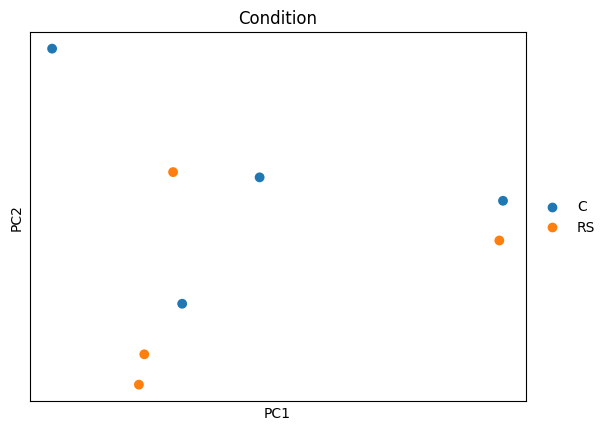

In [31]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [32]:
#GSEA - analisa grupos de genes em conjunto, revelando insights biológicos mais robustos.

import gseapy as gp
from gseapy.plot import gseaplot

In [33]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132,THAP3
ENSG00000198744,120.137318,0.569431,2.236123,0.254651,NaN,NaN,MTCO3P12
ENSG00000142611,23.766575,-1.889206,0.883023,-2.139474,0.032397,0.179729,PRDM16
ENSG00000225630,922.811465,0.732964,0.408622,1.793748,0.072853,0.292902,MTND2P28
...,...,...,...,...,...,...,...
ENSG00000198727,46929.471443,0.271032,0.268363,1.009947,0.312521,0.628233,MT-CYB
ENSG00000210196,77.259551,0.457372,0.223366,2.047635,0.040596,0.206184,MT-TP
ENSG00000276256,32.825088,-0.834185,0.632601,-1.318659,0.187283,0.487127,AC011043.1


In [34]:
#rankeando genes por expressão aumentada
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
Geneid,,
ENSG00000040341,STAU2,10.143220
ENSG00000145390,USP53,8.254562
ENSG00000106366,SERPINE1,7.809237
ENSG00000261115,TMEM178B,7.735058
ENSG00000197746,PSAP,7.382811
...,...,...
ENSG00000164163,ABCE1,-9.725978
ENSG00000143549,TPM3,-9.793049
ENSG00000071626,DAZAP1,-9.828079


In [35]:
ranking = ranking.drop_duplicates('Symbol') #remove linhas com genes duplicadas

In [36]:
ranking

,Symbol,stat
Geneid,,
ENSG00000040341,STAU2,10.143220
ENSG00000145390,USP53,8.254562
ENSG00000106366,SERPINE1,7.809237
ENSG00000261115,TMEM178B,7.735058
ENSG00000197746,PSAP,7.382811
...,...,...
ENSG00000164163,ABCE1,-9.725978
ENSG00000143549,TPM3,-9.793049
ENSG00000071626,DAZAP1,-9.828079


In [37]:
manual_set = {'things':['STAU2', 'USP53', 'SERPINE1', 'TMEM178B', 'PSAP']}

In [38]:
#gp.get_library_name() #to look at available libraries

In [39]:
print(ranking.head())
print(ranking.shape)  # Verifique o número de colunas

                   Symbol       stat
Geneid                              
ENSG00000040341     STAU2  10.143220
ENSG00000145390     USP53   8.254562
ENSG00000106366  SERPINE1   7.809237
ENSG00000261115  TMEM178B   7.735058
ENSG00000197746      PSAP   7.382811
(13662, 2)


In [40]:
res_df = stat_res.summary()

Log2 fold change & Wald test p-value: Condition RS vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                      
ENSG00000186827    1.107782        2.119166  1.486697  1.425419  0.154036   
ENSG00000186891    1.071147        2.761974  1.566738  1.762882  0.077920   
ENSG00000160072  320.481168       -0.492175  0.147030 -3.347457  0.000816   
ENSG00000041988  103.354977       -0.282138  0.130485 -2.162226  0.030601   
ENSG00000260179    0.758697       -1.637766  1.558991 -1.050529  0.293475   
...                     ...             ...       ...       ...       ...   
ENSG00000278817    0.352622        1.119898  1.744744  0.641870  0.520958   
ENSG00000278384    3.791022       -0.243724  0.662745 -0.367750  0.713060   
ENSG00000276345    4.833929       -0.092388  3.260101 -0.028339  0.977392   
ENSG00000271254   58.543851        0.316375  0.333484  0.948695  0.342776   
ENSG00000275987    0

In [42]:
import pandas as pd

# Resetar o índice para transformar 'Geneid' e 'Symbol' em colunas normais
ranking_df_reset = ranking_df.reset_index()

# Selecionar e renomear as colunas corretamente
ranking_correto = ranking_df_reset[['Symbol', 'stat']].rename(
    columns={'Symbol': 'gene_name', 'stat': 'prerank'}
)

# Remover duplicatas (se houver)
ranking_correto = ranking_correto.drop_duplicates('gene_name').dropna()

# Verificar o resultado
print(ranking_correto.head())

  gene_name    prerank
0     STAU2  10.143220
1     USP53   8.254562
2  SERPINE1   7.809237
3  TMEM178B   7.735058
4      PSAP   7.382811


In [43]:
import gseapy as gp

#realizar uma análise de enriquecimento de conjuntos gênicos (GSEA, Gene Set Enrichment Analysis) em um ranking de genes pré-definido, combinando bancos de dados padrão (como GO) com conjuntos personalizados. 
#pre_res = gp.prerank(rnk = ranking, gene_sets = ['GO_Biological_Process_2021', manual_set], seed = 6, permutation_num = 100)
ranking_df = (
    ranking
)

pre_res = gp.prerank(
    rnk=ranking_correto,
    gene_sets=['GO_Biological_Process_2023', manual_set],
    permutation_num=100
)

2025-04-05 18:31:35,708 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [44]:
ranking_correto

,gene_name,prerank
0,STAU2,10.143220
1,USP53,8.254562
2,SERPINE1,7.809237
3,TMEM178B,7.735058
4,PSAP,7.382811
...,...,...
13657,ABCE1,-9.725978
13658,TPM3,-9.793049
13659,DAZAP1,-9.828079
13660,NRAS,-11.311653


In [45]:
#Esse código organiza os resultados do GSEA em um DataFrame limpo e classificável. 
#O que o código faz:
#Extrai métricas-chave de cada termo/conjunto gênico analisado no GSEA:
#Term: Nome do conjunto gênico (ex.: via metabólica ou seu grupo personalizado)
#fdr: FDR (False Discovery Rate) - valor-p ajustado para múltiplos testes (quanto menor, mais significativo)
#es: Enrichment Score - medida bruta de enriquecimento
#nes: Normalized Enrichment Score - versão normalizada do ES (permite comparação entre conjuntos)

out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2023__DNA Replication In...,0.0,-0.823793,-2.379980
1,GO_Biological_Process_2023__RNA Transport (GO:...,0.0,-0.662534,-2.219222
2,GO_Biological_Process_2023__Positive Regulatio...,0.0,-0.531610,-2.247674
3,GO_Biological_Process_2023__Monoatomic Cation ...,0.0,0.545751,2.403269
4,GO_Biological_Process_2023__Mitotic Spindle As...,0.0,-0.705388,-2.419371
...,...,...,...,...
2073,GO_Biological_Process_2023__Tumor Necrosis Fac...,1.0,0.152527,0.498025
2074,GO_Biological_Process_2023__Regulation Of Subs...,1.0,-0.162094,-0.557438
2075,GO_Biological_Process_2023__Hemopoiesis (GO:00...,1.0,-0.172183,-0.681335
2076,GO_Biological_Process_2023__Regulation Of Cell...,1.0,0.166454,0.508148


In [46]:
# realiza uma operação específica para identificar o termo/conjunto gênico com o maior NES (Normalized Enrichment Score) nos resultados do GSEA. 
out_df.sort_values('nes').iloc[0].Term

'GO_Biological_Process_2023__mRNA Splicing, Via Spliceosome (GO:0000398)'

C:\Users\edusa\AppData\Local\Temp\ipykernel_7596\1777205916.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


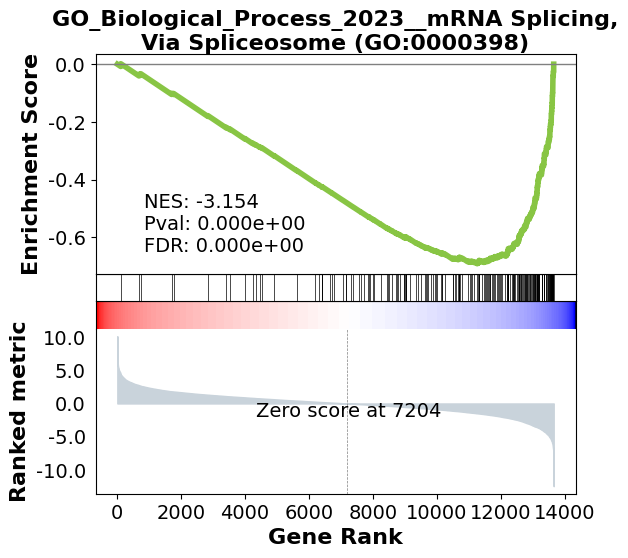

In [47]:
from gseapy.plot import gseaplot
import matplotlib.pyplot as plt 
# extrair os parâmetros do termo específico
termo = 'GO_Biological_Process_2023__mRNA Splicing, Via Spliceosome (GO:0000398)'
params = pre_res.results[termo]

# criar uma cópia do dicionário de parâmetros e remove a chave 'term' se existir
plot_params = params.copy()
plot_params.pop('term', None)  # Remove 'term' se existir para evitar duplicação

#  Gerar o plot corretamente
gseaplot(
    rank_metric=pre_res.ranking,
    term=termo,
    **params
)

# 5. Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

In [48]:
import numpy as np
import seaborn as sns

In [49]:
# stores a normalized expression matrix (genes × cells)
dds.layers['normed_counts']

array([[  0.        ,   0.99504649, 359.21178396, ...,  19.90092986,
         55.72260361,   0.        ],
       [  0.        ,   0.        , 326.26705735, ...,   0.        ,
         42.02503081,   0.        ],
       [  0.86997733,   0.        , 361.91056914, ...,   0.        ,
         46.9787758 ,   0.86997733],
       ...,
       [  0.        ,   3.12841738, 272.17231221, ...,  18.77050429,
        104.80198229,   0.        ],
       [  0.        ,   2.08655037, 256.64569522, ...,   0.        ,
         51.12048401,   0.        ],
       [  3.53873778,   2.35915852, 238.27501079, ...,   0.        ,
         62.51770085,   0.        ]])

In [50]:
# realiza uma transformação logarítmica (log1p) nos dados normalizados de expressão gênica
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [51]:
dds.layers['log1p']

array([[0.        , 0.69066735, 5.88669215, ..., 3.03979365, 4.03817278,
        0.        ],
       [0.        , 0.        , 5.79077653, ..., 0.        , 3.76178206,
        0.        ],
       [0.62592631, 0.        , 5.89415644, ..., 0.        , 3.87075874,
        0.62592631],
       ...,
       [0.        , 1.41789413, 5.61010278, ..., 2.98419114, 4.66156926,
        0.        ],
       [0.        , 1.12705408, 5.55158537, ..., 0.        , 3.95355804,
        0.        ],
       [1.51264895, 1.2116905 , 5.47761356, ..., 0.        , 4.15131862,
        0.        ]])

In [101]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000069424,231.438079,1.135128,0.276396,4.106888,4.010261e-05,1.342057e-03,KCNAB2
ENSG00000116254,16.685968,2.713808,0.659952,4.112128,3.920294e-05,1.322754e-03,CHD5
ENSG00000204138,315.739587,-0.543588,0.131546,-4.132290,3.591673e-05,1.239615e-03,PHACTR4
ENSG00000198830,1111.179223,-1.207821,0.352071,-3.430615,6.022151e-04,1.041796e-02,HMGN2
ENSG00000060688,363.794327,-0.623651,0.093196,-6.691831,2.203959e-11,1.138620e-08,SNRNP40
...,...,...,...,...,...,...,...
ENSG00000160298,76.683762,-1.196214,0.364446,-3.282282,1.029704e-03,1.558889e-02,C21orf58
ENSG00000159055,123.457054,-0.951653,0.321382,-2.961125,3.065173e-03,3.518989e-02,MIS18A
ENSG00000160193,135.509940,-0.712941,0.252288,-2.825895,4.714877e-03,4.787860e-02,WDR4


In [102]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 1162
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [124]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

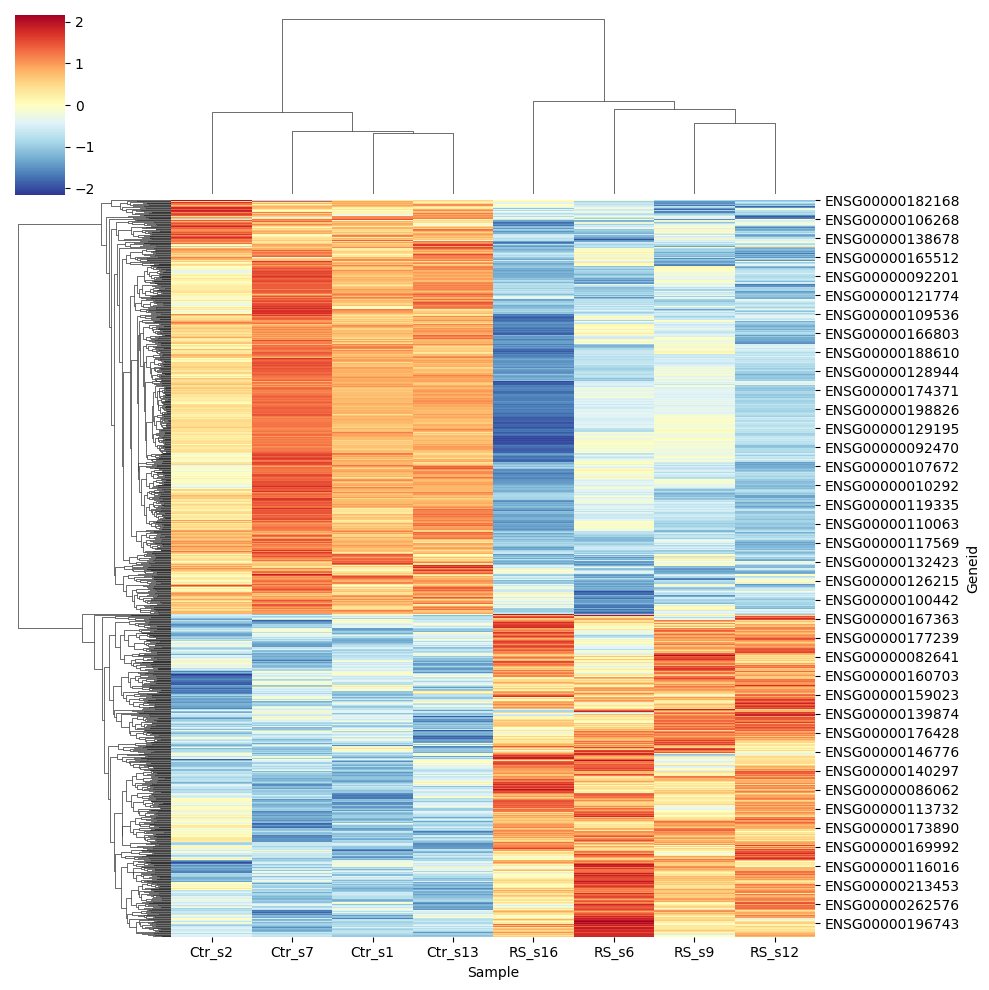

In [125]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [170]:
with open("genes_list_as_strings.csv", "r") as file:
    genes = file.read().strip().split(",")
    genes = [gene.strip('"') for gene in genes]

In [182]:
genes

['CDKN2A',
 'CDKN1A',
 'CDKN2B',
 'IL6',
 'IL8',
 'CXCL1',
 'CXCL2',
 'CXCL3',
 'CXCL5',
 'CXCL6',
 'MMP1',
 'MMP2',
 'MMP3',
 'MMP9',
 'MMP10',
 'MMP12',
 'MMP13',
 'MMP14',
 'SERPINE1',
 'IGFBP7',
 'SASP',
 'CCND1',
 'CCNE1',
 'BCL2',
 'BAX',
 'IL1A',
 'IL1B',
 'IL10',
 'TNF',
 'TGFB1',
 'CCL2',
 'CCL5',
 'CCL20',
 'ICAM1',
 'VCAM1',
 'RELA',
 'STAT1',
 'STAT3',
 'HIF1A',
 'PTGS2',
 'NOX4',
 'EDN1',
 'COL1A1',
 'COL1A2',
 'COL3A1',
 'TIMP1',
 'TIMP2',
 'SOD2',
 'NRF2',
 'LMNB1',
 'GDF15',
 'BMP2',
 'BMP4',
 'BMP6',
 'CTGF',
 'FGF2',
 'FGF7',
 'IGFBP2',
 'IGFBP3',
 'IGFBP4',
 'IGFBP5',
 'IGFBP6',
 'LOX',
 'LOXL2',
 'MMP11',
 'MMP15',
 'MMP16',
 'MMP17',
 'MMP19',
 'MMP20',
 'MMP24',
 'MMP25',
 'MMP27',
 'MMP28',
 'ANXA1',
 'TP53',
 'CDKN1B',
 'ATM',
 'ATR',
 'CHEK1',
 'CHEK2',
 'SIRT1',
 'SIRT6',
 'TERT',
 'LMNA',
 'RB1',
 'E2F1',
 'E2F2',
 'E2F3',
 'CCND2',
 'CCND3',
 'FOXO1',
 'FOXO3',
 'FOXO4',
 'HSPB1',
 'PML',
 'SAHF',
 'DDIT3',
 'XBP1',
 'ATF6']

In [ ]:
sigs[

In [198]:
sigs[sigs.Symbol.isin(genes)].index

Index(['ENSG00000113368', 'ENSG00000106366', 'ENSG00000146674',
       'ENSG00000147889', 'ENSG00000035862', 'ENSG00000271503',
       'ENSG00000125966', 'ENSG00000101412', 'ENSG00000130513'],
      dtype='object', name='Geneid')

In [199]:
dds_sub = dds[:, sigs[sigs.Symbol.isin(genes)].index]

In [200]:
dds_sub

View of AnnData object with n_obs × n_vars = 8 × 9
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [202]:
grapher = pd.DataFrame(dds_sub.layers['log1p'].T,
                       index=dds_sub.var_names, columns=dds_sub.obs_names)

In [203]:
grapher.index = grapher.index.map(mapper.mapper)

In [204]:
grapher

Sample,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
LMNB1,6.693308,6.041412,7.246656,6.717729,5.140168,5.643882,4.917246,3.527190
SERPINE1,10.940599,11.100268,10.955758,11.153568,11.651848,12.029931,11.861163,11.947979
IGFBP3,9.154503,8.898189,9.218882,9.205999,9.303741,10.551874,9.699758,9.855071
CDKN2A,5.551881,5.069954,5.113767,5.551664,5.702586,5.892561,6.610385,7.043327
TIMP2,9.216315,9.370149,9.320031,9.190763,9.622696,9.759793,10.101443,9.668156
CCL5,0.690667,1.191579,0.000000,0.600290,4.716196,2.603702,1.418235,2.345322
MMP24,3.632751,3.725617,3.648292,3.816017,4.235256,4.484083,4.626909,4.926030
E2F1,5.322935,5.157241,5.811744,5.789251,5.250777,4.719024,4.751521,4.352503
GDF15,5.664932,4.638491,5.354388,5.475396,7.655135,6.890938,5.788436,5.806525


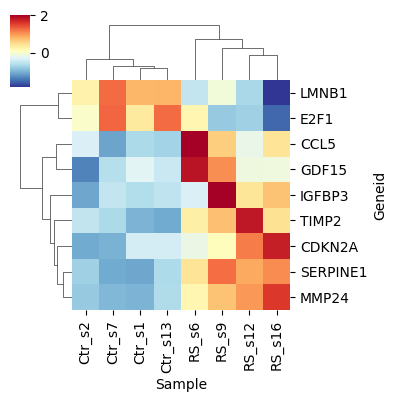

In [205]:
ax = sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r', figsize=(4,4))

In [206]:
#volcano
from sanbomics.plots import volcano

In [207]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132,THAP3
ENSG00000198744,120.137318,0.569431,2.236123,0.254651,NaN,NaN,MTCO3P12
ENSG00000142611,23.766575,-1.889206,0.883023,-2.139474,0.032397,0.179729,PRDM16
ENSG00000225630,922.811465,0.732964,0.408622,1.793748,0.072853,0.292902,MTND2P28
...,...,...,...,...,...,...,...
ENSG00000198727,46929.471443,0.271032,0.268363,1.009947,0.312521,0.628233,MT-CYB
ENSG00000210196,77.259551,0.457372,0.223366,2.047635,0.040596,0.206184,MT-TP
ENSG00000276256,32.825088,-0.834185,0.632601,-1.318659,0.187283,0.487127,AC011043.1


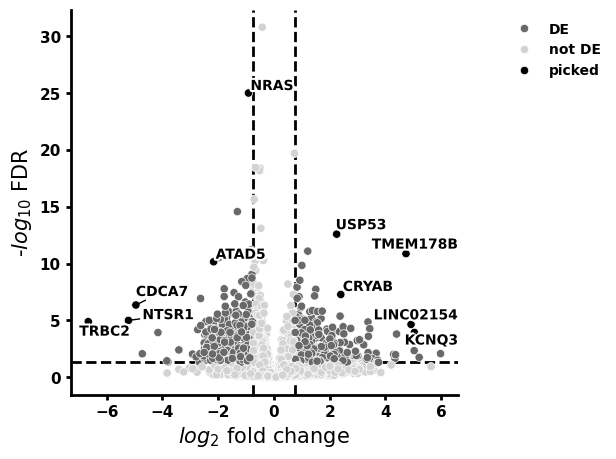

In [208]:
volcano(res, symbol='Symbol')

In [209]:
grapher.index

Index(['LMNB1', 'SERPINE1', 'IGFBP3', 'CDKN2A', 'TIMP2', 'CCL5', 'MMP24',
       'E2F1', 'GDF15'],
      dtype='object', name='Geneid')

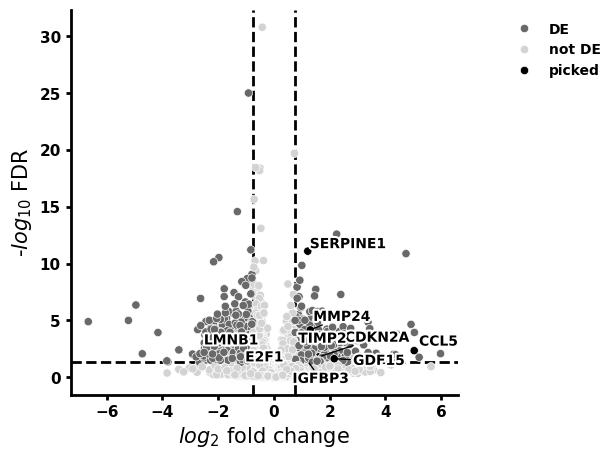

In [210]:
volcano(res, symbol='Symbol', to_label = grapher.index)